In [53]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline




In [54]:
DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml/tree/master/'
HOUSING_PATH = "datasets/housing"
HOUSING_URL =  DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # fetch the data from housing_url
    urllib.request.urlretrieve(housing_url, tgz_path)
    # extract the tgz file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


# fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Take a Quich Look at the Data Structure

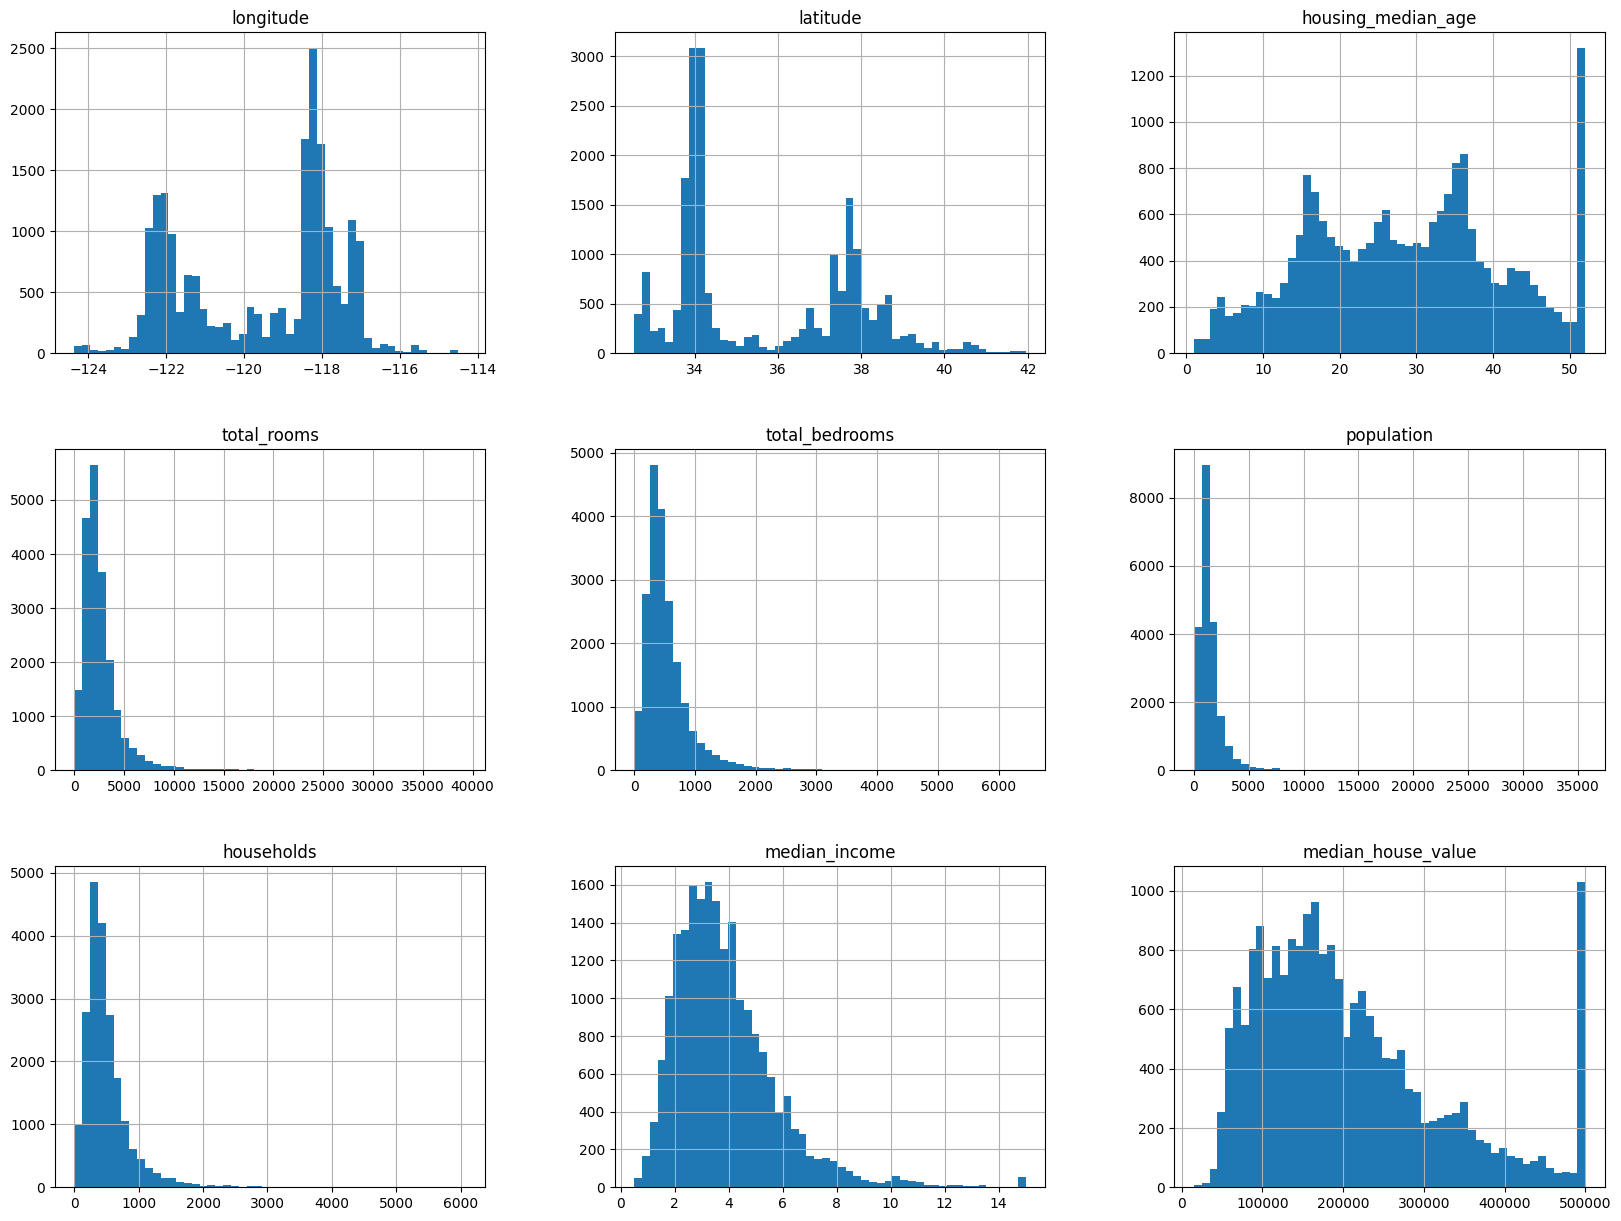

In [55]:
housing = load_housing_data()
# print(housing.info())
# print(housing.head())
# print(housing.describe())
housing.hist(bins=50, figsize=(20, 15))

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Straitified Sampling Method


In [56]:
# housing['median_income'].hist()
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
# housing['income_cat'].hist()
# print(housing['income_cat'])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# test if this works as expected
# print(housing['income_cat'].value_counts() / len(housing))
compare = pd.DataFrame()
compare['overall'] = housing['income_cat'].value_counts() / len(housing)
# print(compare['overall'])
compare['stratified'] = strat_train_set["income_cat"].value_counts() / len(strat_train_set) 
compare['start_rate'] = compare['overall'] / compare['stratified']
print(compare)

# remove income_cat field 
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

C:\Users\Polygon\AppData\Local\Temp\ipykernel_17504\4062012529.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)


             overall  stratified  start_rate
income_cat                                  
3.0         0.350581    0.350594    0.999965
2.0         0.318847    0.318859    0.999962
4.0         0.176308    0.176296    1.000069
5.0         0.114438    0.114462    0.999788
1.0         0.039826    0.039789    1.000913


Discover and Visualize the Data to Gain Insights

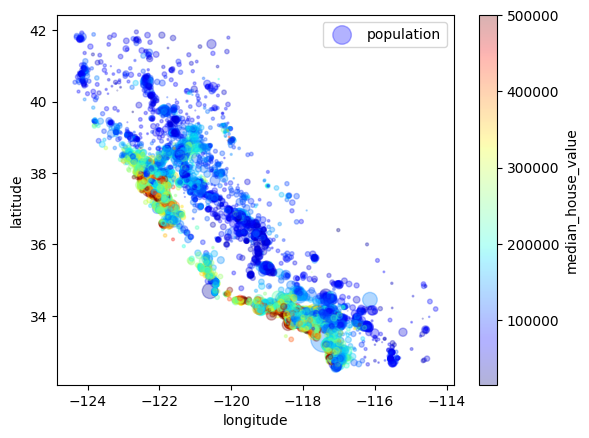

In [72]:
# Visualizing Geographical Data

housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/100, label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()



In [ ]:

# Looking for Correlations
# print(housing.head())

if 'ocean_proximity' in housing.columns:    
    housing_label = housing['ocean_proximity']
    housing.drop('ocean_proximity', axis=1, inplace=True)
else:
    print("Column 'ocean_proximity' not found.")
# corr_matrix = housing.corr()

# Experimenting with Attribute Combination
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']


corr_matrix = housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  median_house_value  
12655      2237.0       706.0         2.1736             72100.0  
15502      2015.0       768.0         6.3373            279600.0  
2908        667.0       300.0         2.8750             82700.0  
14053       898.0       483.0         2.2264            112500.0  
20496      1837.0       580.0         4.4964            238300.0  
Column 'ocean_proximity' not found.
median_house_value          1.000000
median_income               0.687151
room_per_hous